KMeans**算法过程**：<br>
1 随机抽取K个样本作为最初的质心；<br>
2 循环：<br>
2.1 将每个样本点分配到离他们最近的质心，生成K个簇；<br>
2.2 对于每个簇，计算所有被分到该簇的样本点的平均值作为新的质心；<br>
3 当质心的位置不再发生变化，迭代停止，聚类完成。<br>
KMeans追求的是，求解能够让簇内平方和最小化的质心。

样本点到质心的**距离度量**：欧几里得距离、曼哈顿距离（质心是中位数）、余弦距离（文本）等。

KMeans算法**时间复杂度**：<br>
平均O(k\*N\*T)，其中k是簇数，n是样本量，T是迭代次数。

# 一、类

`sklearn.cluster.KMeans`(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')

### （一）重要参数

#### 1.n_clusters

n_clusters是KMeans中的k，表示模型要分几类。这是KMeans当中唯一一个必填的参数，默认为8类。通常，在开始聚类之前并不知道n_clusters是多少，因此要对它进行探索。

In [1]:
from sklearn.datasets import make_blobs #自己创建数据集
import matplotlib.pyplot as plt

（1）生成数据

In [2]:
#500个数，2个特征，random_state=1每次形成的X和y都一样
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [3]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [4]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

（2）可视化（2-4类甚至更多都有可能）

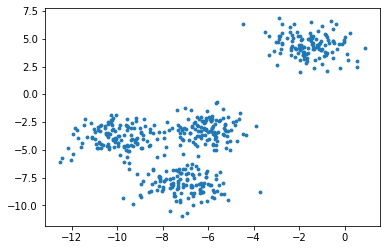

In [5]:
fig, ax1 = plt.subplots(1) #生成一个子图，fig是画布，ax1是子图

#在子图ax1上画散点图
ax1.scatter(X[:, 0], X[:, 1]
           ,marker='o' #点的形状
           ,s=8 #点的大小
           )
plt.show()

（3）使用KMeans聚类（假设不知道有几簇）。

In [6]:
from sklearn.cluster import KMeans

①聚成3类。

In [7]:
n_clusters = 3

In [8]:
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(X)

In [9]:
y_pred = cluster.labels_ #属性labels_，查看聚好的类别
y_pred

array([0, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 2,

In [10]:
pre = cluster.fit_predict(X) #fit_predict（数据量大）与fit+labels一模一样
pre == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

其实不必使用所有的数据来寻找质心，少量数据即可确定质心，剩下数据的聚类结果，使用predict来调用，数据量非常大时效果可能比较好。但是500条数据取200条效果不太好（有很多False）：

In [11]:
cluster_smallsub = KMeans(n_clusters=n_clusters, random_state=0).fit(X[:200])
y_pred_ = cluster_smallsub.predict(X)
y_pred == y_pred_

array([False, False,  True, False,  True, False,  True,  True,  True,
        True, False, False,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False, False,  True,  True,  True,
       False, False,

In [12]:
centroid = cluster.cluster_centers_ #属性cluster_centers_，查看质心
centroid

array([[-7.09306648, -8.10994454],
       [-1.54234022,  4.43517599],
       [-8.0862351 , -3.5179868 ]])

In [13]:
centroid.shape

(3, 2)

In [14]:
inertia = cluster.inertia_ #属性inertia_，查看总距离平方和
inertia

1903.4503741659241

可视化（不同的簇显示不同的颜色）：

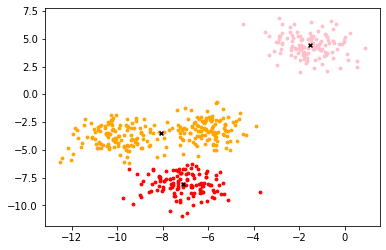

In [15]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(X[y_pred==i, 0], X[y_pred==i, 1]
               ,marker='o'
               ,s=8
               ,c=color[i]
               )
#质心
ax1.scatter(centroid[:,0],centroid[:,1]
           ,marker="x"
           ,s=15
           ,c="black"
           )
plt.show()

②聚成4类。

In [16]:
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_ #小于聚成3类的1903.4503741659241

908.3855684760603

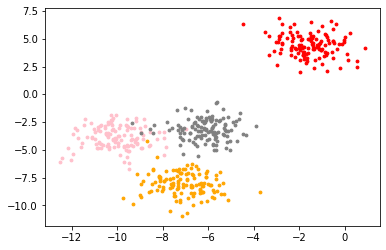

In [17]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(n_clusters):
    ax1.scatter(X[y==i, 0], X[y==i, 1]
               ,marker='o' #点的形状
               ,s=8 #点的大小
               ,c=color[i]
               )
plt.show()

③聚成5类。

In [18]:
n_clusters = 5
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

811.0841324482416

④聚成6类。

In [19]:
n_clusters = 6
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

733.1538350083074

⑤聚成500类。

In [20]:
n_clusters = 500
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
inertia_ = cluster_.inertia_
inertia_

0.0

inertia不是有效的模型评估指标。<br>
首先，它不是有界的。我们只知道，Inertia是越小越好，是0最好，但我们不知道，一个较小的Inertia究竟有没有达到模型的极限，能否继续提高。<br>
第二，它的计算太容易受到**特征数目**的影响，数据维度很大的时候，Inertia的计算量会陷入维度诅咒之中，计算量会爆炸，不适合用来一次次评估模型。<br>
第三，它会受到**超参数K**的影响，在我们之前的常识中其实我们已经发现，随着K越大，Inertia注定会越来越小，但这并不代表模型的效果越来越好了。<br>
第四，Inertia对数据的分布有假设，它假设数据满足**凸分布**（即数据在二维平面图像上看起来是一个凸函数的样子），并且它假设数据是各向同性的（isotropic），即是说数据的属性在不同方向上代表着相同的含义。但是现实中的数据往往不是这样。所以使用Inertia作为评估指标，会让聚类算法在一些**细长簇**，**环形簇**，或者**不规则形状的流形**时表现不佳。

聚类模型的结果不是某种标签输出，并且聚类的结果是不确定的，其优劣由**业务需求**或者**算法需求**来决定，并且没有永远的正确答案。

（4）聚类算法的模型评估指标

①当真实标签已知时（非常少见）

模型评估指标|说明
-|-
**互信息分**<br>普通互信息分<br>metrics.adjusted_mutual_info_score (y_pred, y_true)<br>调整的互信息分<br>metrics.mutual_info_score (y_pred, y_true)<br>标准化互信息分<br>metrics.normalized_mutual_info_score (y_pred, y_true)|取值范围在(0,1)，越接近1，聚类效果越好，在随机均匀聚类下产生0分。
**V-measure：基于条件上分析的一系列直观度量**<br>同质性：是否每个簇仅包含单个类的样本<br>metrics.homogeneity_score(y_true, y_pred)<br>完整性：是否给定类的所有样本都被分配给同一个簇中<br>metrics.completeness_score(y_true, y_pred)<br>同质性和完整性的调和平均，叫做V-measure<br>metrics.v_measure_score(labels_true, labels_pred)<br>三者可以被一次性计算出来：<br>metrics.homogeneity_completeness_v_measure(labels_true,labels_pred)<br>|取值范围在(0,1)，越接近1，聚类效果越好。由于分为同质性和完整性两种度量，可以更仔细地研究，模型到底哪个任务做得不够好。对样本分布没有假设，在任何分布上都可以有不错的表现。在随机均匀聚类下不会产生0分。
调整兰德系数<br>metrics.adjusted_rand_score(y_true, y_pred)|取值在(-1,1)，负值象征着簇内的点差异巨大，甚至相互独立，正类的兰德系数比较优秀，越接近1越好。对样本分布没有假设，在任何分布上都可以有不错的表现，尤其是在具有"折叠"形状的数据上表现优秀。在随机均匀聚类下产生0分。

②当真实标签未知时：轮廓系数或卡林斯基-哈拉巴斯指数Calinski-Harabaz Index

<1>轮廓系数

在99%的情况下，是对没有真实标签的数据进行探索，也就是对不知道真正答案的数据进行聚类。这样的聚类，是完全依赖于评价簇内的稠密程度（簇内差异小）和簇间的离散程度（簇外差异大）来评估聚类的效果。其中轮廓系数是最常用的聚类算法的评价指标。它是对每个样本来定义的，它能够同时衡量：<br>
a.样本与其**自身所在的簇中的其他样本**的相似度a，等于样本与同一簇中所有其他点之间的平均距离；<br>
b.样本与**其他簇中的样本**的相似度b，等于样本与下一个最近的簇中的所有点之间的平均距离<br>
根据聚类的要求“簇内差异小，簇外差异大”，我们希望b永远大于a，并且大得越多越好。<br>
单个样本的轮廓系数计算为：
$$s=\frac{b-a}{max(a,b)}$$
轮廓系数范围是**(-1,1)**，越接近于1越好，负数则表示聚类效果非常差。<br>
如果一个簇中的大多数样本具有比较高的轮廓系数，则簇会有较高的总轮廓系数，则整个数据集的平均轮廓系数越高，则聚类是合适的。如果许多样本点具有低轮廓系数甚至负值，则聚类是不合适的，聚类的超参数K可能设定得太大或者太小。<br>

使用`sklearn.metrics.silhouette_score`计算轮廓系数，返回的是一个数据集中，**所有样本**的轮廓系数的**均值**。<br>
使用`sklearn.metrics.silhouette_sample`计算轮廓系数，返回的是数据集中**每个样本**自己的轮廓系数。

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [22]:
#分3簇
n_clusters = 3
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster_.labels_ #属性labels_，查看聚好的类别
silhouette_score(X,y_pred) #参数：特征矩阵，模型聚类结果

0.5882004012129721

In [23]:
#分4簇
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster_.labels_ #属性labels_，查看聚好的类别
silhouette_score(X,y_pred) #参数：特征矩阵，模型聚类结果

0.6505186632729437

In [24]:
silhouette_samples(X,y_pred) #每个样本的轮廓系数

array([ 0.62903385,  0.43289576,  0.55834047,  0.82660742,  0.35213124,
        0.74123252,  0.68902347,  0.58705868,  0.04062548,  0.73241492,
        0.59363669,  0.75135825,  0.66326503,  0.81480193,  0.45066007,
        0.59477448,  0.10348453,  0.66633309,  0.84176332,  0.6089521 ,
        0.70366952,  0.66565716,  0.59626118,  0.78488729,  0.64257685,
        0.53469157,  0.86623858,  0.80913231,  0.62625573,  0.70079616,
        0.62490578,  0.83417556,  0.74035924,  0.54405603,  0.71658615,
        0.6694404 ,  0.69313134,  0.60546734,  0.58315885,  0.59179481,
        0.64472091,  0.56153618,  0.73581549,  0.50944136,  0.66243564,
        0.73163465,  0.57031198,  0.68128648,  0.85802959,  0.76946886,
        0.81915048,  0.68541025,  0.5406262 ,  0.72334031,  0.63576372,
        0.69892782,  0.64245745,  0.40251287,  0.57213237,  0.46118988,
        0.83726051,  0.80179027,  0.45393636,  0.54665199,  0.85023055,
        0.6688164 ,  0.69778864,  0.69091353,  0.68586222,  0.46

In [25]:
#分5簇
n_clusters = 5
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster_.labels_ #属性labels_，查看聚好的类别
silhouette_score(X,y_pred) #参数：特征矩阵，模型聚类结果

0.5746932321727457

In [26]:
#分6簇
n_clusters = 6
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster_.labels_ #属性labels_，查看聚好的类别
silhouette_score(X,y_pred) #参数：特征矩阵，模型聚类结果

0.5150064498560357

轮廓系数有很多优点，它在**有限**空间中取值，使得我们对模型的聚类效果有一个“参考”。并且，轮廓系数**对数据的分布没有假设**，因此在很多数据集上都表现良好。且它在每个簇的**分割比较清晰**时表现最好。<br>
但轮廓系数也有缺陷，它在**凸型的类**上表现会虚高，比如基于密度进行的聚类或通过DBSCAN获得的聚类结果，如果使用轮廓系数来衡量，则会表现出比真实聚类效果更高的分数。

<2>卡林斯基-哈拉巴斯指数Calinski-Harabaz Index

除了轮廓系数是最常用的，还有卡林斯基-哈拉巴斯指数（Calinski-Harabasz Index，简称CHI，也被称为方差比标准）`sklearn.metrics.calinski_harabasz_score`(X, y_pred)，戴维斯-布尔丁指数（Davies-Bouldin）`sklearn.metrics.davies_bouldin_score`(X, y_pred)以及权变矩阵（Contingency Matrix）`sklearn.metrics.cluster.contingency_matrix`(X, y_pred)可以使用。

Calinski-Harabaz指数越高越好。对于有k个簇的聚类而言，Calinski-Harabaz指数s(k)写作如下公式：
$$s(k)=\frac{T_r(B_k)}{T_r(W_k)}*\frac{N-k}{k-1}$$

其中N为数据集中的样本量，k为簇的个数（即类别的个数），$B_k$是组间离散矩阵，即不同簇之间的协方差矩阵，$W_k$是簇内离散矩阵，即一个簇内数据的协方差矩阵，而tr表示矩阵的迹。在线性代数中，一个n×n矩阵A的主对角线（从左上方至右下方的对角线）上各个元素的总和被称为矩阵A的迹（或迹数），一般记作$tr(A)$。数据之间的离散程度越高，协方差矩阵的迹就会越大。组内离散程度低，协方差的迹就会越小，$Tr(W_k)$也就越小，同时，组间离散程度大，协方差的的迹也会越大，$Tr(B_k)$就越大，因此Calinski-harabaz指数越高越好。

In [27]:
from sklearn.metrics import calinski_harabasz_score

In [28]:
#分4簇
n_clusters = 4
cluster_ = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
y_pred = cluster_.labels_ #属性labels_，查看聚好的类别
calinski_harabasz_score(X, y_pred) #参数：特征矩阵，模型聚类结果

2704.4858735121097

虽然calinski-Harabasz指数没有界，在凸型的数据上的聚类也会表现虚高，但是比起轮廓系数，它有一个巨大的优点，就是计算非常快速。

In [29]:
from time import time

In [30]:
t0 = time()
calinski_harabasz_score(X,y_pred)
time() - t0 #卡林斯基-哈拉巴斯指数

0.0009970664978027344

In [31]:
t0 = time()
silhouette_score(X,y_pred)
time() - t0 #轮廓系数

0.005983114242553711

In [32]:
t0 #时间戳

1630919650.5834954

In [33]:
import datetime
#将时间戳转换为真正的时间格式
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2021-09-06 17:14:10'

（5）案例：基于轮廓系数寻找最佳n_clusters

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colormap
import numpy as np
import pandas as pd

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


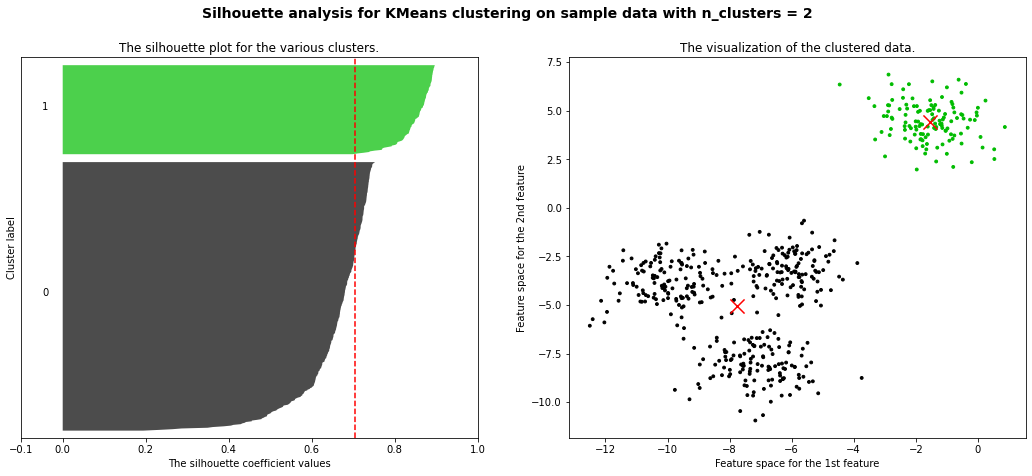

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


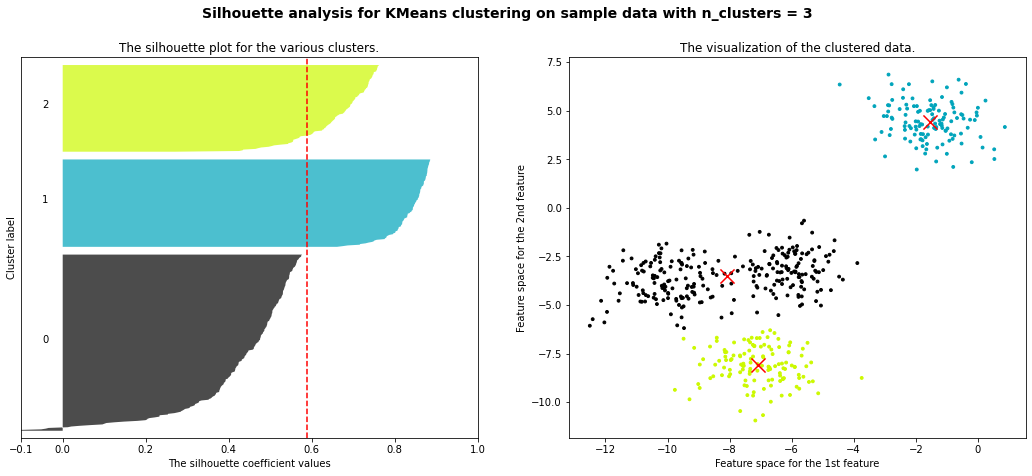

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


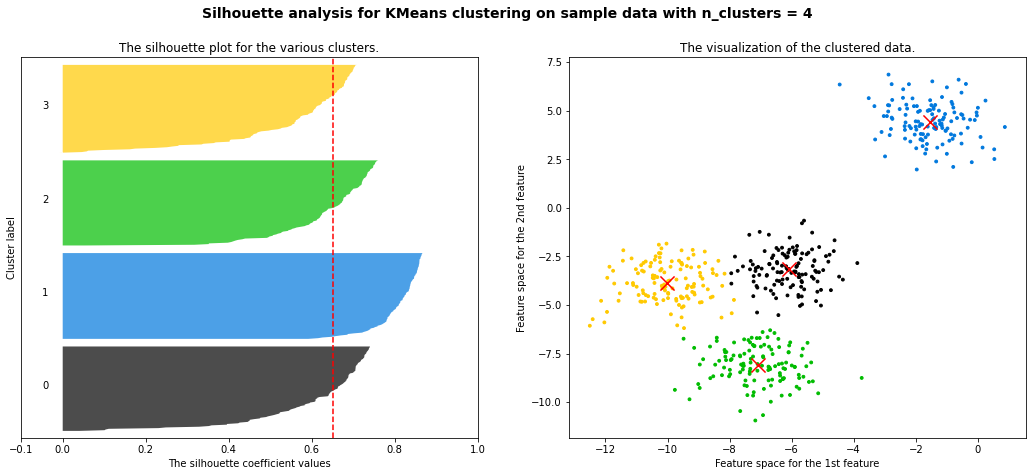

For n_clusters = 5 The average silhouette_score is : 0.56376469026194


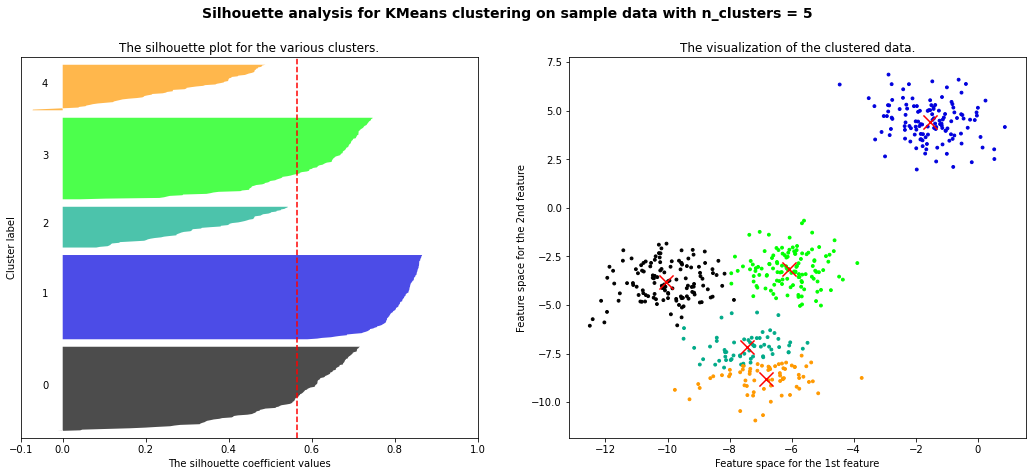

For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


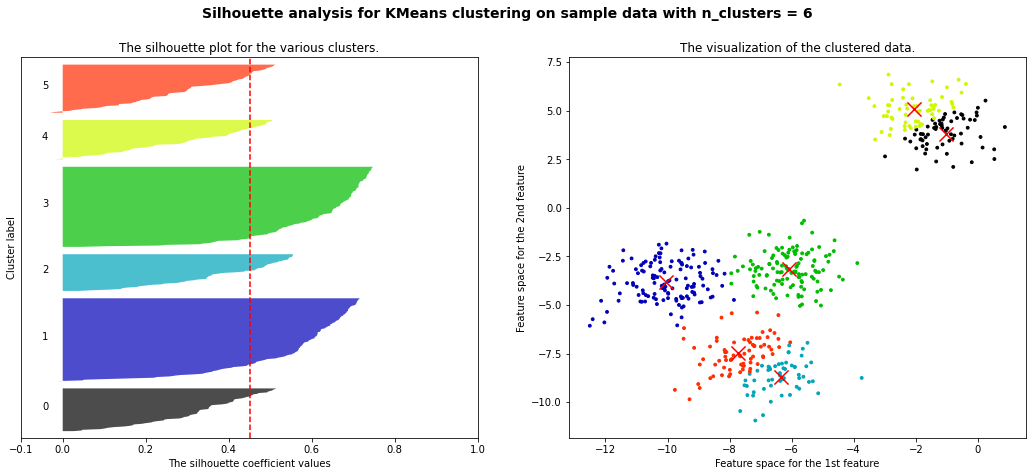

For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


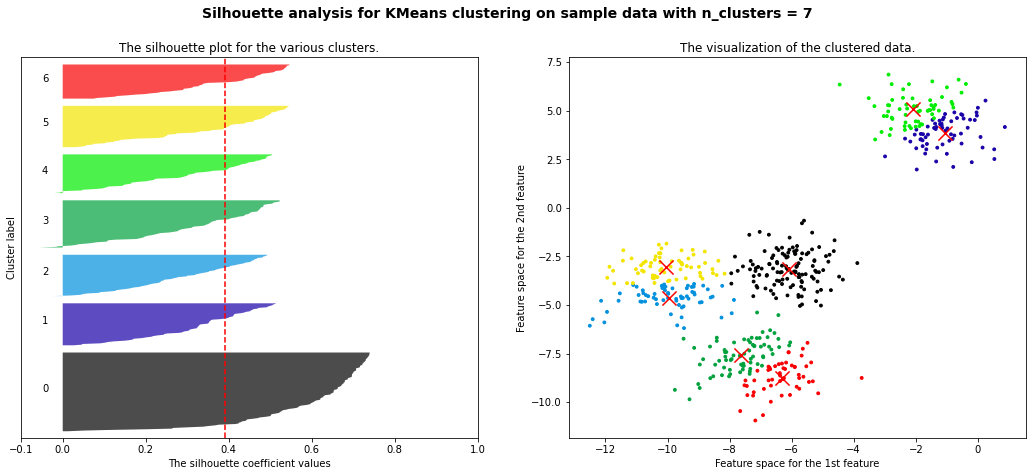

In [35]:
for n_clusters in [2,3,4,5,6,7]: #循环聚成几簇
    n_clusters = n_clusters #聚成几簇
    fig, (ax1, ax2) = plt.subplots(1, 2) #创建画布和两个子图
    fig.set_size_inches(18, 7) #画布尺寸
    ax1.set_xlim([-0.1, 1]) #x轴坐标范围（轮廓系数范围）
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10]) #y轴坐标范围（每个簇的每个样本）
    clusterer = KMeans(n_clusters=n_clusters, random_state=10).fit(X) #实例化+拟合
    cluster_labels = clusterer.labels_ #类别
    silhouette_avg = silhouette_score(X, cluster_labels) #所有样本轮廓系数均值
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels) #每个样本的轮廓系数
    
    y_lower = 10 #设置y的初始取值，因为不希望第一个样本贴着x轴画图
    for i in range(n_clusters): #循环第几簇
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i] #第i簇的每个样本的轮廓系数
        ith_cluster_silhouette_values.sort() #从小到大排序
        size_cluster_i = ith_cluster_silhouette_values.shape[0] #第i个簇的样本数
        y_upper = y_lower + size_cluster_i #第i簇的上界
        color = cm.nipy_spectral(float(i)/n_clusters) #画第i簇的颜色，nipy_spectral[(输入任意小数代表一个颜色)]
        #fill_betweenx的范围在纵坐标上，避免有很多细小的柱子（纵坐标的下限，纵坐标的上限，x轴的取值，柱状图的颜色）
        ax1.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values, facecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) #添加文本（类似y轴刻度i）
        y_lower = y_upper + 10 #画i+1簇的下界
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") #在x轴上添加红色虚线，表示以该n_clusters聚类的均值
    ax1.set_yticks([]) #不显示y轴刻度
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) #x轴刻度
    
    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters) #每个样本的颜色，在同一簇的样本颜色相同
    ax2.scatter(X[:, 0], X[:, 1], marker='o', s=8, c=colors)
    centers = clusterer.cluster_centers_ #每簇的质心
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x', c="red", alpha=1, s=200) #红叉
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')
    plt.show()

分成2簇：轮廓系数最高，但是主要由绿色的簇贡献的，黑色的簇只有很少的部分过了均值。<br>
分成3簇：独立的蓝色簇分得最好，黑色簇的轮廓系数没有超过均值的，并且还有负数。<br>
分成5簇：最下面分成了两簇，没有超过均值的。<br>
分成6簇：绿色和蓝色簇超过轮廓系数均值的最多。<br>
分成7簇：轮廓系数均值最低。<br>
最终分成2簇还是4簇看业务。

#### 2.init & random_state & n_init：初始质心

在K-Means中有一个重要的环节，就是放置初始质心。如果有足够的时间，K-means一定会收敛，但Inertia可能收敛到**局部最小值**。是否能够收敛到真正的最小值很大程度上取决于**质心的初始化**。init就是用来决定初始化方式的参数。

**init**：可输入"**k-means++**"，"**random**"或者一个**n维数组**。这是**初始化质心的方法**，默认"k-means++"。输入"kmeans++"：一种为K均值聚类选择初始聚类中心的办法，以加速收敛。如果输入了n维数组，数组的形状应该是(n_clusters，n_features)并给出初始质心。

可以使用random_state参数来**控制每次生成的初始质心都在相同位置**，甚至可以画学习曲线来确定最优的random_state是哪个整数。

**random_state**：控制每次质心随机初始化的随机数种子。

使用参数n_init来选择每个随机数种子下**运行的次数**。这个参数不常用到，默认10次，如果希望运行的结果更加精确，那可以增加这个参数n_init的值来增加每个随机数种子下运行的次数。

**n_init**：整数，默认10，使用不同的质心随机初始化的种子来**运行k-means算法的次数**。最终结果会是基于Inertia来计算的n_init次连续运行后的最佳输出。

In [36]:
plus = KMeans(n_clusters = 10).fit(X) #init='kmeans++'
plus.n_iter_ #迭代次数

10

In [37]:
random = KMeans(n_clusters = 10,init="random",random_state=420).fit(X) #init='random'
random.n_iter_ #迭代次数

19

#### 3.max_iter & tol：让迭代停下来

当质心不再移动，Kmeans算法就会停下来。但在完全收敛之前，也可以使用max_iter最大迭代次数，或tol两次迭代间Inertia下降的量，这两个参数来让迭代提前停下来。

**max_iter**：整数，默认300，单次运行的k-means算法的最大迭代次数。

**tol**：浮点数，默认$10^{-4}$，两次迭代间Inertia下降的量，如果两次迭代之间Inertia下降的值小于tol所设定的值，迭代就会停下。

In [38]:
#为了举例，n_clusters=10
random = KMeans(n_clusters = 10,init="random",max_iter=10,random_state=420).fit(X)
y_pred_max10 = random.labels_
silhouette_score(X,y_pred_max10)

0.3952586444034157

In [39]:
#为了举例，n_clusters=10
random = KMeans(n_clusters = 10,init="random",max_iter=20,random_state=420).fit(X)
y_pred_max20 = random.labels_
silhouette_score(X,y_pred_max20)

0.3401504537571701

### （二）重要属性与重要接口

#### 1.接口

fit：训练模型。<br>
predict：测试模型。<br>
transform：将X转换到簇距离空间中。<br>
score：簇内平方和的负数。<br>
fit_predict：相当于fit+predict。<br>
fit_transform：相当于fit_transform。<br>
get_params：获取该类的参数。<br>
set_params：为设定好的类重设参数。

#### 2.属性

labels_：查看聚好的类别。<br>
cluster_centers_：查看质心。<br>
inertia_：查看总距离平方和。<br>
n_iter_：迭代次数。<br>

# 二、函数

`sklearn.cluster.k_means`(X, n_clusters, sample_weight=None, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=None,
algorithm='auto', return_n_iter=False)

In [40]:
from sklearn.cluster import k_means
k_means(X,4,return_n_iter=True) #返回质心、标签值、簇内平方和、最佳迭代次数（return_n_iter=True）

(array([[ -1.54234022,   4.43517599],
        [ -7.09306648,  -8.10994454],
        [-10.00969056,  -3.84944007],
        [ -6.08459039,  -3.17305983]]),
 array([1, 1, 2, 0, 3, 0, 3, 3, 3, 3, 1, 1, 3, 0, 3, 1, 3, 1, 0, 3, 2, 2,
        3, 0, 3, 3, 0, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 2, 1, 2, 3, 2, 0, 3,
        3, 1, 2, 3, 0, 0, 0, 2, 2, 3, 1, 2, 2, 2, 2, 3, 0, 0, 2, 3, 0, 3,
        1, 3, 2, 2, 1, 2, 3, 1, 3, 3, 1, 3, 3, 2, 0, 0, 2, 0, 0, 2, 2, 0,
        2, 2, 0, 1, 2, 3, 0, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 3, 0, 0, 2,
        3, 1, 0, 2, 0, 2, 0, 3, 0, 3, 2, 1, 1, 2, 3, 2, 0, 1, 1, 3, 0, 2,
        2, 2, 2, 1, 0, 3, 0, 0, 3, 1, 3, 0, 0, 0, 3, 3, 1, 1, 2, 2, 0, 1,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 3, 0, 1, 2, 3, 1, 0, 2,
        2, 2, 2, 1, 3, 2, 0, 1, 1, 2, 3, 1, 1, 3, 0, 0, 1, 1, 3, 0, 3, 1,
        1, 0, 1, 2, 0, 3, 3, 1, 3, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 0, 2, 0,
        3, 1, 2, 3, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 3, 2,
        1, 1, 1, 1, 3, 2, 1, 2, 